# **Text Summarization Using BART**

# **Summarization: The Basics**

There are two main approaches to summarization:

**Extractive summarization:** it works by selecting the most meaningful sentences in an article and arranging them in a comprehensive manner. This means the summary sentences are extracted from the article without any modifications.

**Abstractive summarization:** it works by paraphrasing its own version of the most important sentence in the article.

## **Extractive Summarization**


All extractive summarizers is formed of three independent tasks:


**1) Construction of an intermediate representation of the input text**

There are two types of representation-based approaches: topic representation and indicator representation. Topic representation transforms the text into an intermediate representation and interpret the topic(s) discussed in the text. The techniques used for this differ in terms of their complexity, and are divided into frequency-driven approaches, topic word approaches, latent semantic analysis and Bayesian topic models. Indicator representation describes every sentence as a list of formal features (indicators) of importance such as sentence length, position in the document, having certain phrases, etc.

**2) Scoring the sentences based on the representation.**

When the intermediate representation is generated, an importance score is assigned to each sentence. In topic representation approaches, the score of a sentence represents how well the sentence explains some of the most important topics of the text. In indicator representation, the score is computed by aggregating the evidence from different weighted indicators.


**3) Selection of a summary comprising of a number of sentences**

The summarizer system selects the top k most important sentences to produce a summary. Some approaches use greedy algorithms to select the important sentences and some approaches may convert the selection of sentences into an optimization problem where a collection of sentences is chosen, considering the constraint that it should maximize overall importance and coherency and minimize the redundancy.

### **Approaches to Extractive Summarization:**

*   Topic Representation Approaches
    * Topic words
    * Frequency-driven approaches
    * Latent Semantic Analysis

*   Indicator representation approaches

    * Graph Methods
    * Machine Learning



Source - https://paperswithcode.com/sota/abstractive-text-summarization-on-cnn-daily

# **BART: CRUX**


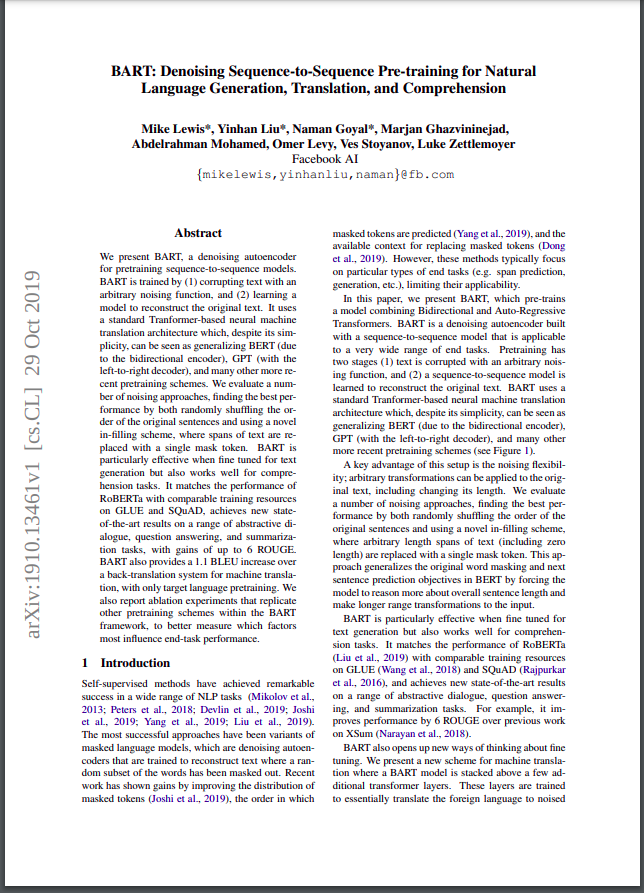

**Approach Used**

Bidirectional and Auto-Regressive Transformers

A denoising autoencoder for pretraining sequence-to-sequence models. BART is trained by:

1. Corrupting text with an arbitrary noising function
2. Learning a model to reconstruct the original text.


Few of the tasks it can solve:

1. Abstractive Dialogue
2. Question Answering
3. Summarization Tasks

# **BART Basics: Encoder**

BART Architecture consists of a standard seq2seq/ NMT architecture


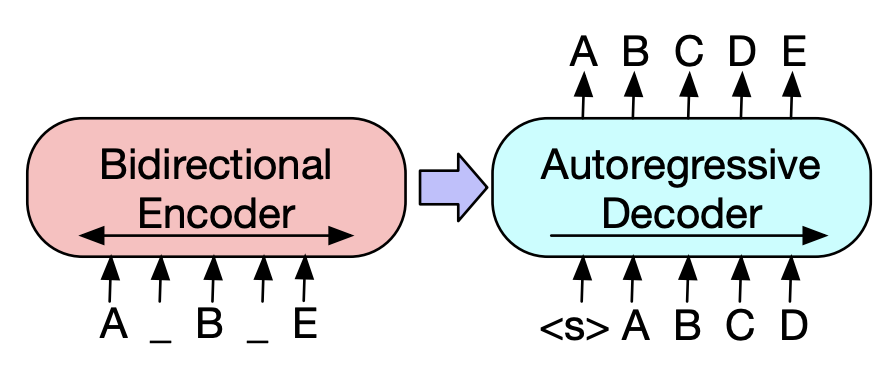

**Why BART: Model Comparison**

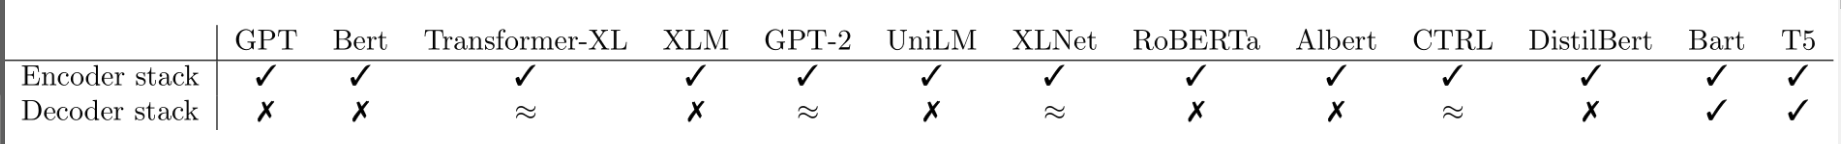

BART combines the power with both an encoder and a decoder layer giving SOTA results in comparison to other models

# **BART Basics: Encoder - Decoder Architecture**


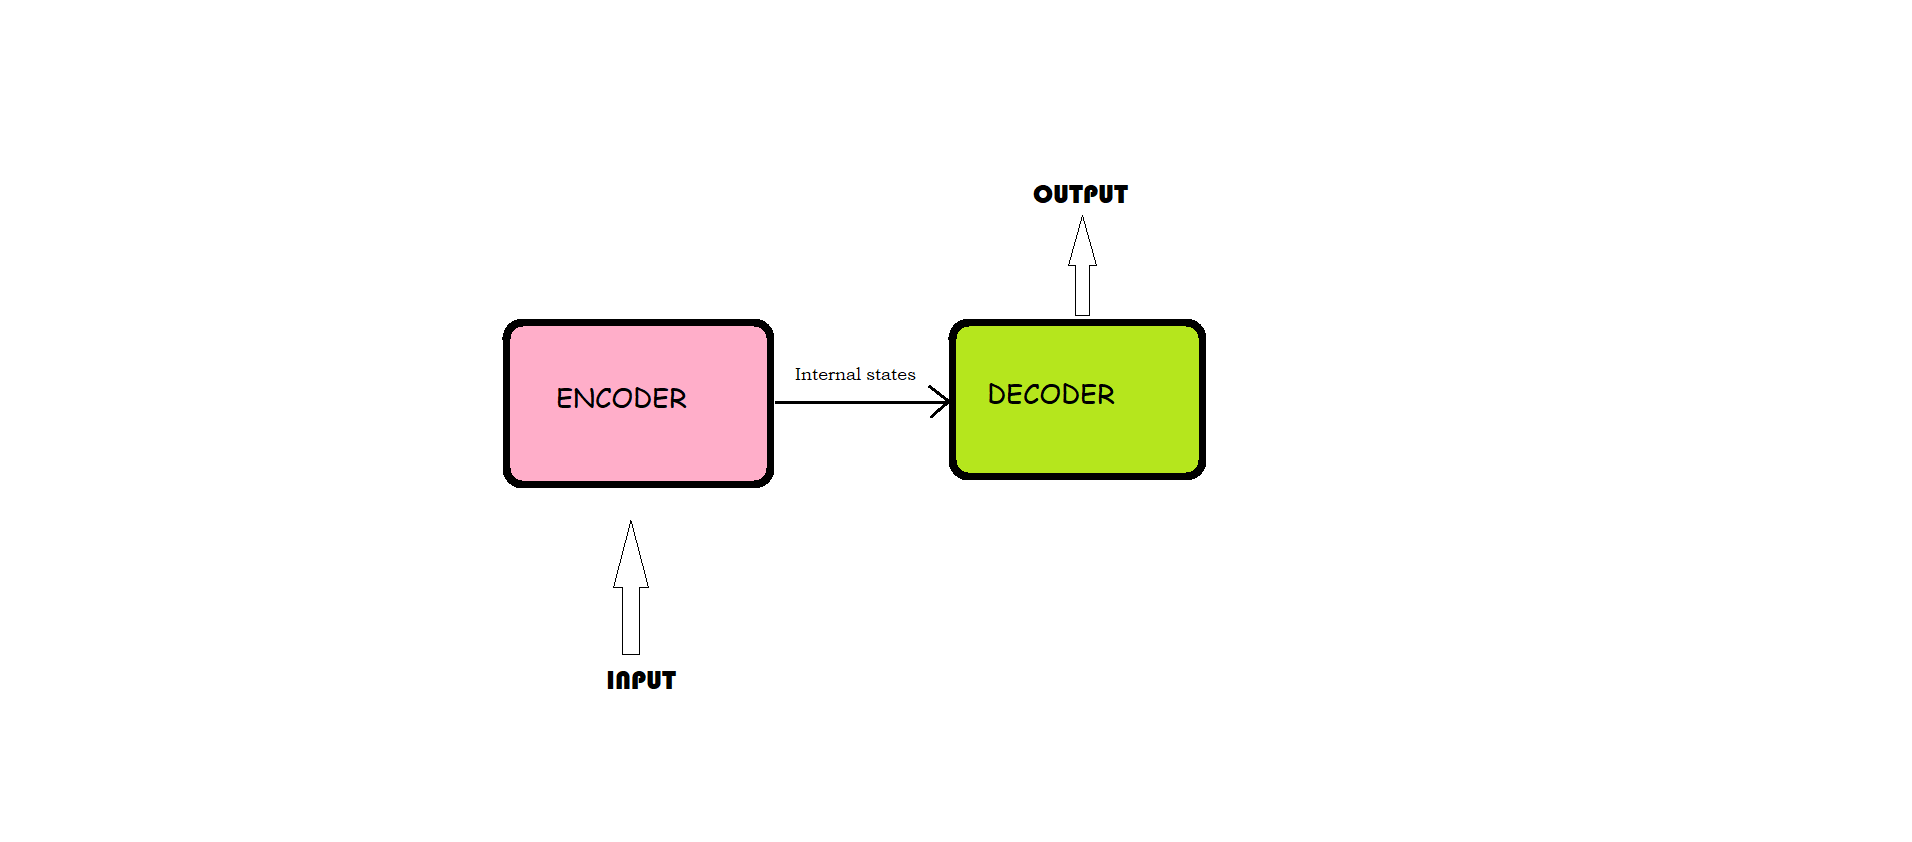

***Encoder*** -It accepts a single element of the input sequence at each time step, process it, collects information for that element and propagates it forward.

***Intermediate vector***- This is the final internal state produced from the encoder part of the model. It contains information about the entire input sequence to help the decoder make accurate predictions.

***Decoder***- given the entire sentence, it predicts an output at each time step.

# **BART Summarization Pre-Training Data Description: CNN/ DM**




The CNN/DailyMail (Hermann et al., 2015) dataset contains 93k articles from the CNN, and 220k articles the Daily Mail newspapers. Both publishers supplement their articles with bullet point summaries. Non-anonymized variant in See et al. (2017).


Download and unzip the stories directories from here for both CNN and Daily Mail. The files can be downloaded from the terminal with gdown, which can be installed with pip install gdown.

In [ ]:
!pip install datasets

from datasets import load_dataset, list_datasets

datasets = list_datasets()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.9 MB/s eta 0:00:00


<ipython-input-1-b7d0ed43556a>:5: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  datasets = list_datasets()
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Permalink: https://huggingface.co/datasets/viewer/?dataset=cnn_dailymail&config=3.0.0



In [ ]:
from pprint import pprint

print(f"🤩 Currently {len(datasets)} datasets are available on the hub:")
pprint(datasets, compact=True)

Streaming output truncated to the last 5000 lines.
 'stablediffusiontutorials/Stable-Video-3d-ComfyUI-nodes',
 'manishiitg/aditi-syn-v2', 'HiTZ/Multilingual-Medical-Corpus',
 'evalsone/CN_general_questions_evaluation',
 'ravithejads/ms_marco_hi_mr_te_ta_ur_bn', 'kokujin/json_data_luis',
 'King955/mistral_dataset_save', 'mii-community/UsenetArchiveIT-conversations',
 'lvdthieu/java-42k', 'jaban/err', 'PageTurnIO/squad-v2-copy-task',
 'Narayana02/ACCIDENT_TINY_LLAMA', 'globc/DocVQA', 'sombuck/sample',
 'huynq3Cyradar/data4Training', 'PageTurnIO/squad-v2-reference-task',
 'distilabel-internal-testing/test-distiset-2-configs',
 'YegorS/Mintaka_Updated_Sequences_Mixtral', 'DigitalUmuganda/AfriVoice',
 'ivillar/mdb-mtt-mc-drums-v2', 'evoeval/EvoEval_difficult',
 'triangulum66/bubble_dataset_2', 'open-cn-llm-leaderboard/mmlu_asc',
 'pavane/examplehotels', 'Thota02/TINY', 'data-store/Facebook-Comment-vLabeler',
 'Tanmay1605/waste-classification', 'gsstein/25-percent-human-dataset-opt',
 'jadec

In [ ]:
dataset_ = load_dataset('cnn_dailymail', '3.0.0', split='train[:15]')

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

In [ ]:
print(dataset_)

Dataset({
    features: ['article', 'highlights', 'id'],
    num_rows: 15
})


In [ ]:
print(f"👉Dataset len(dataset): {len(dataset_)}")
print("\n👉First item 'dataset[0]':")
pprint(dataset_[0])

👉Dataset len(dataset): 15

👉First item 'dataset[0]':
{'article': 'LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe '
            'gains access to a reported £20 million ($41.1 million) fortune as '
            "he turns 18 on Monday, but he insists the money won't cast a "
            'spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter '
            'and the Order of the Phoenix" To the disappointment of gossip '
            'columnists around the world, the young actor says he has no plans '
            'to fritter his cash away on fast cars, drink and celebrity '
            'parties. "I don\'t plan to be one of those people who, as soon as '
            'they turn 18, suddenly buy themselves a massive sports car '
            'collection or something similar," he told an Australian '
            'interviewer earlier this month. "I don\'t think I\'ll be '
            'particularly extravagant. "The things I like buying are things '
            'that cost a

# **BART Fine Tuning: Methodologies**



**What is finetuning?**

Fine-tuning, in general, means making small adjustments to a process to achieve the desired output or performance. Fine-tuning deep learning involves using weights of a previous deep learning algorithm for programming another similar deep learning process. Weights are used to connect each neuron in one layer to every neuron in the next layer in the neural network. The fine-tuning process significantly decreases the time required for programming and processing a new deep learning algorithm as it already contains vital information from a pre-existing deep learning algorithm.

**Why finetuning?**

***Pros:***

* Greatly **reduced training time**. By using pre-trained weights, the model's first few layers are already very effective. You just need to train the final layers of your model.

* **Improved performance**. Models you usually used are pre-trained on large scale datasets (most commonly the ImageNet dataset). Because CNNs performance improves with more training data, the lower-level filters of pre-trained models are probably superior to filters trained on smaller datasets.

* **Counter over-fitting on small datasets**. CNNs need a lot of data to generalize properly, even when data augmentation techniques are applied. When trained on small datasets, their lower and mid-level filters tend to adapt specifically to the training set, leading the model to overfit. In contrast ImageNet is a very large (millions of images) and very diverse (1000 classes) dataset and filters of CNNs trained on it can extract very generic features. Using a pre-trained network is the only way I'm aware of with which you can train a CNN effectively on

***Cons:***

* No guarantee that the initialization point of the weights is a good starting point; they could be stuck in a **local minimum**. On the other hand by training a model from scratch could lead to a better solution, which might be unobtainable by starting from the initialization point of the pre-trained model. This is relevant if both runs (initial training and fine-tuning) are done on the same dataset.

* **Restricted architecture**. The most important downside of using pre-trained models are that we are restricted to use exactly the same architecture, which might not be desirable. The good thing is that pre-trained weights are available for almost all state-of-the-art models.

**BART-Fine tuning Down Stream Tasks**

The representations produced by BART can be used in
several ways for downstream applications.


* **Sequence Classification Tasks**
For sequence classification tasks, the same input is fed
into the encoder and decoder, and the final hidden state
of the final decoder token is fed into new multi-class
linear classifier. This approach is related to the CLS
token in BERT; however we add the additional token
to the end so that representation for the token in the
decoder can attend to decoder states from the complete
input.


* **Token Classification Tasks**
For token classification tasks, such as answer endpoint
classification for SQuAD, we feed the complete document into the encoder and decoder, and use the top
hidden state of the decoder as a representation for each
word. This representation is used to classify the token.


* **Sequence Generation Tasks**
Because BART has an autoregressive decoder, it can be
directly fine tuned for sequence generation tasks such
as abstractive question answering and summarization.
In both of these tasks, information is copied from the input but manipulated, which is closely related to the
denoising pre-training objective. Here, the encoder input is the input sequence, and the decoder generates
outputs autoregressively

* **Machine Translation**
We also explore using BART to improve machine translation decoders for translating into English. Previous
work Edunov et al. (2019) has shown that models can
be improved by incorporating pre-trained encoders, but
gains from using pre-trained language models in decoders have been limited. We show that it is possible
to use the entire BART model (both encoder and decoder) as a single pretrained decoder for machine translation, by adding a new set of encoder parameters that
are learned from bitext

### **BART Fine-Tuning: Using Transformers**

In [ ]:
!pip install transformers
!pip install pytorch_lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.9/801.9 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 22.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-man

In [ ]:
import torch
from torch.nn import functional as F
from torch import nn
import pytorch_lightning as pl
# https://www.pytorchlightning.ai/

from transformers import BartForConditionalGeneration, BartTokenizer
from sklearn.model_selection import train_test_split
import pandas as pd

from transformers import (
    AdamW,
    get_linear_schedule_with_warmup
)
from torch.utils.data import DataLoader

In [ ]:
# Checking out the GPU we have access to. This is output is from the google colab version.
!nvidia-smi

Sun Apr 14 07:13:27 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
class Dataset(torch.utils.data.Dataset):
    """Class Used a dataset loader with defined overidden methods as required by
    `pytorch` dataloader.

    For more information about Dataset, Dataloader read:

    https://pytorch.org/tutorials/beginner/data_loading_tutorial.html
    """

    def __init__(self, texts, summaries, tokenizer, source_len, summ_len):
        self.texts = texts
        self.summaries = summaries
        self.tokenizer = tokenizer
        self.source_len  = source_len
        self.summ_len = summ_len

    def __len__(self):
        return len(self.summaries) - 1

    def __getitem__(self, index):
        text = ' '.join(str(self.texts[index]).split())

        summary = ' '.join(str(self.summaries[index]).split())

        # Article text pre-processing
        source = self.tokenizer.batch_encode_plus([text],
                                                  max_length= self.source_len,
                                                  pad_to_max_length=True,
                                                  return_tensors='pt')
        # Summary Target pre-processing
        target = self.tokenizer.batch_encode_plus([summary],
                                                  max_length= self.summ_len,
                                                  pad_to_max_length=True,
                                                  return_tensors='pt')

        return (
            source['input_ids'].squeeze(),
            source['attention_mask'].squeeze(),
            target['input_ids'].squeeze(),
            target['attention_mask'].squeeze()
        )

class BARTDataLoader(pl.LightningDataModule):
    '''Pytorch Ligtning Model Dataloader class for BART'''

    def __init__(self, tokenizer, text_len, summarized_len, file_path,
                 corpus_size, columns_name, train_split_size, batch_size):
        super().__init__()
        self.tokenizer = tokenizer
        self.text_len = text_len
        self.summarized_len = summarized_len
        self.input_text_length = summarized_len
        self.file_path = file_path
        self.nrows = corpus_size
        self.columns = columns_name
        self.train_split_size = train_split_size
        self.batch_size = batch_size

    def prepare_data(self):
        data = pd.read_csv(self.file_path, nrows=self.nrows,
                               encoding='latin-1')
        data = data[self.columns]
        data.iloc[:, 1] = 'summarize: ' + data.iloc[:, 1]
        self.text =  list(data.iloc[:, 0].values)
        self.summary =  list(data.iloc[:, 1].values)

    def setup(self):
        X_train , y_train, X_val, y_val = train_test_split(
            self.text, self.summary
        )

        self.train_dataset = (X_train, y_train)
        self.val_dataset = (X_val, y_val)

    def train_dataloader(self):
        train_data = Dataset(texts=self.train_dataset[0],
                             summaries=self.train_dataset[1],
                             tokenizer=self.tokenizer,
                             source_len=self.text_len,
                             summ_len=self.summarized_len)
        return DataLoader(train_data, self.batch_size)

    def val_dataloader(self):
        val_dataset = Dataset(texts=self.val_dataset[0],
                             summaries=self.val_dataset[1],
                             tokenizer=self.tokenizer,
                             source_len=self.text_len,
                             summ_len=self.summarized_len)
        return DataLoader(val_dataset, self.batch_size)

In [ ]:
class AbstractiveSummarizationBARTFineTuning(pl.core.LightningModule):
    """Abstractive summarization model class"""

    def __init__(self, model, tokenizer):
        super().__init__()
        self.model = model
        self.tokenizer = tokenizer
        self.training_step_outputs = []

    def forward(self, input_ids, attention_mask, decoder_input_ids,
                decoder_attention_mask=None, lm_labels=None):
        """Model forward pass"""
        outputs = self.model.forward(
            input_ids=input_ids,
            attention_mask=attention_mask,
            decoder_input_ids=decoder_input_ids,
            labels=decoder_input_ids
        )

        return outputs


    def preprocess_batch(self, batch):
        """Reformatting batch"""

        input_ids, source_attention_mask, decoder_input_ids, \
        decoder_attention_mask = batch

        y = decoder_input_ids
        decoder_ids = decoder_input_ids
        source_ids = input_ids
        source_mask = source_attention_mask

        return source_ids, source_mask, decoder_ids, decoder_attention_mask, decoder_attention_mask

    def training_step(self, batch, batch_idx):
        """Model Training Step computes """

        input_ids, source_attention_mask, decoder_input_ids, \
        decoder_attention_mask, lm_labels = self.preprocess_batch(batch)

        outputs = self.forward(input_ids=input_ids, attention_mask=source_attention_mask,
                               decoder_input_ids=decoder_input_ids,
                               decoder_attention_mask=decoder_attention_mask,
                               lm_labels=lm_labels
                       )
        loss = outputs.loss

        return loss

    def validation_step(self, batch, batch_idx):
        """"""

        input_ids, source_attention_mask, decoder_input_ids, \
        decoder_attention_mask, lm_labels = self.preprocess_batch(batch)

        outputs = self.forward(input_ids=input_ids, attention_mask=source_attention_mask,
                               decoder_input_ids=decoder_input_ids,
                               decoder_attention_mask=decoder_attention_mask,
                               lm_labels=lm_labels
                       )
        loss = outputs.loss

        return loss

    def on_train_epoch_end(self):
        # Calculate the average loss directly from the trainer's loss buffer.
        avg_loss = torch.stack(self.trainer.callback_metrics["loss"]).mean()
        self.log('Epoch', self.trainer.current_epoch)
        self.log('avg_epoch_loss', {'train': avg_loss})
        self.training_step_outputs.clear()

    def val_epoch_end(self, loss):
        avg_loss = torch.stack(self.trainer.callback_metrics["loss"]).mean()
        self.log('avg_epoch_loss', {'Val': avg_loss})

    def configure_optimizers(self):

        model = self.model
        optimizer = AdamW(model.parameters())
        self.opt = optimizer

        return [optimizer]

In [ ]:
# Tokenizer
model_ = BartForConditionalGeneration.from_pretrained("facebook/bart-base")
tokenizer = BartTokenizer.from_pretrained("facebook/bart-base")

# Dataloader
dataloader = BARTDataLoader(tokenizer=tokenizer, text_len=512,
                            summarized_len=150,
                            file_path='/content/curated_data_subset.csv',
                            corpus_size=50, columns_name=['article_content','summary'],
                            train_split_size=0.8, batch_size=2)
# Read and pre-process data
dataloader.prepare_data()

# Train-test Split
dataloader.setup()

In [ ]:
# Main Model class
model = AbstractiveSummarizationBARTFineTuning(model=model_, tokenizer=tokenizer)

In [ ]:
# Trainer Class
trainer = pl.trainer.Trainer(check_val_every_n_epoch=1, max_epochs=5)

# Fit model
# Check if BARTDataLoader has a setup method with a stage argument
# Fit model without stage argument
trainer.fit(model, dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                         | Params
-------------------------------------------------------
0 | model | BartForConditionalGeneration | 139 M 
-------------------------------------------------------
139 M     Trainable para

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2645: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of trai

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

KeyError: 'loss'

In [ ]:
print(trainer.state)
print(trainer.current_epoch)

TrainerState(status=<TrainerStatus.INTERRUPTED: 'interrupted'>, fn=<TrainerFn.FITTING: 'fit'>, stage=None)
0


In [ ]:
print(trainer.callback_metrics)

{}


# **BART Abstractive Summarization: Using Pre Trained Model**

In [ ]:
from transformers import BartTokenizer, BartForConditionalGeneration, BartConfig

model = BartForConditionalGeneration.from_pretrained('facebook/bart-base')
tokenizer = BartTokenizer.from_pretrained('facebook/bart-base')

ARTICLE_TO_SUMMARIZE = "My friends are cool but they eat too many carbs."
inputs = tokenizer([ARTICLE_TO_SUMMARIZE], max_length=1024, return_tensors='pt')

# Generate Summary
summary_ids = model.generate(inputs['input_ids'], num_beams=4, max_length=5, early_stopping=True)
print([tokenizer.decode(g, skip_special_tokens=True, clean_up_tokenization_spaces=False) for g in summary_ids])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


['My friends']


## **BART Evaluation: ROUGE**


The Recall-Oriented Understudy for Gisting Evaluation (ROUGE) scoring algorithm  calculates the similarity between a candidate document and a collection of reference documents. Use the ROUGE score to evaluate the quality of document translation and summarization models.

**N-gram Co-Occurrence Statistics (ROUGE-N)**

Given an n-gram length n, the ROUGE-N metric between a candidate document and a single reference document is given by

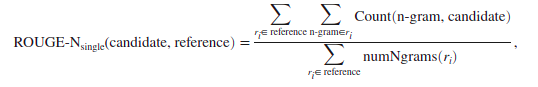

**Longest Common Subsequence (ROUGE-L)**

Given a sentence d=[w
1
,…,w
m
] and a sentence s, where the elements si correspond to words, the subsequence [w
i
1
,…,w
i
k
] is a common subsequence of d and s if w
i
′
j
∈{s
1
,…,s
n
} for j=1,…,k and i
1
​<⋯<i
k
, where the elements of s are the words of the sentence and k is the length of the subsequence. The subsequence [w
i
1
,…,w
i
k
] is a longest common subsequence (LCS) if the subsequence length k is maximal.

Given a candidate document and a single reference document the union of the longest common subsequences is given by


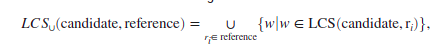


where LCS(candidate,r
i
) is the set of longest common subsequences in the candidate document and the sentence ri from a reference document.

The ROUGE-L metric is an F-score measure. To calculate it, first calculate the recall and precision scores given by


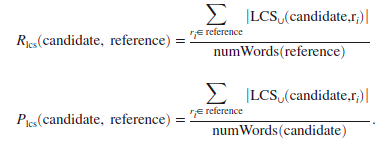

Then, the ROUGE-L metric between a candidate document and a single reference document is given by the F-score measure

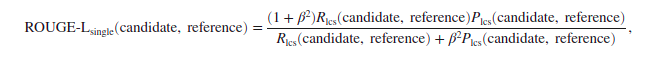

where the parameter β controls the relative importance of the precision and recall. Because the ROUGE score favors recall, β is typically set to a high value.

For sets of multiple reference documents, the ROUGE-L metric is given by

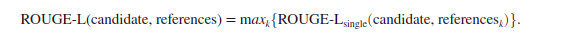


# References:

* https://huggingface.co/transformers/model_doc/bart.html
* https://www.pytorchlightning.ai/
* https://www.frase.io/blog/20-applications-of-automatic-summarization-in-the-enterprise/
* https://medium.com/sciforce/towards-automatic-summarization-part-2-abstractive-methods-c424386a65ea
* https://medium.com/swlh/a-simple-overview-of-rnn-lstm-and-attention-mechanism-9e844763d07b
* https://github.com/CurationCorp/curation-corpus